<a href="https://colab.research.google.com/github/Fathitos34/MULTIVARIATE-TIME-SERIES-FORECASTING-WITH-LSTM-IN-KERAS/blob/main/Multivariate_Time_Series_Forecasting_with_LSTMs_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PRSA_data_2010.1.1-2014.12.31.csv')

In [ ]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [ ]:
import pandas as pd
pollution = pd.read_csv('/content/drive/MyDrive/PRSA_data_2010.1.1-2014.12.31.csv')

In [ ]:
pollution.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
pollution.drop(['No'],axis=1,inplace=True )

In [ ]:
import numpy as np

pollution.dropna(subset=['pm2.5'], axis=0 , inplace=True)

pollution.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
pollution['Timestamp']= pd.to_datetime(pollution[['year','month','day','hour']])
pollution.drop(['year','month','day','hour'],axis=1,inplace=True)
pollution.head()


,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Timestamp
24,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [ ]:
pollution_INDEXED=pollution.set_index('Timestamp')
pollution_INDEXED.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Timestamp,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


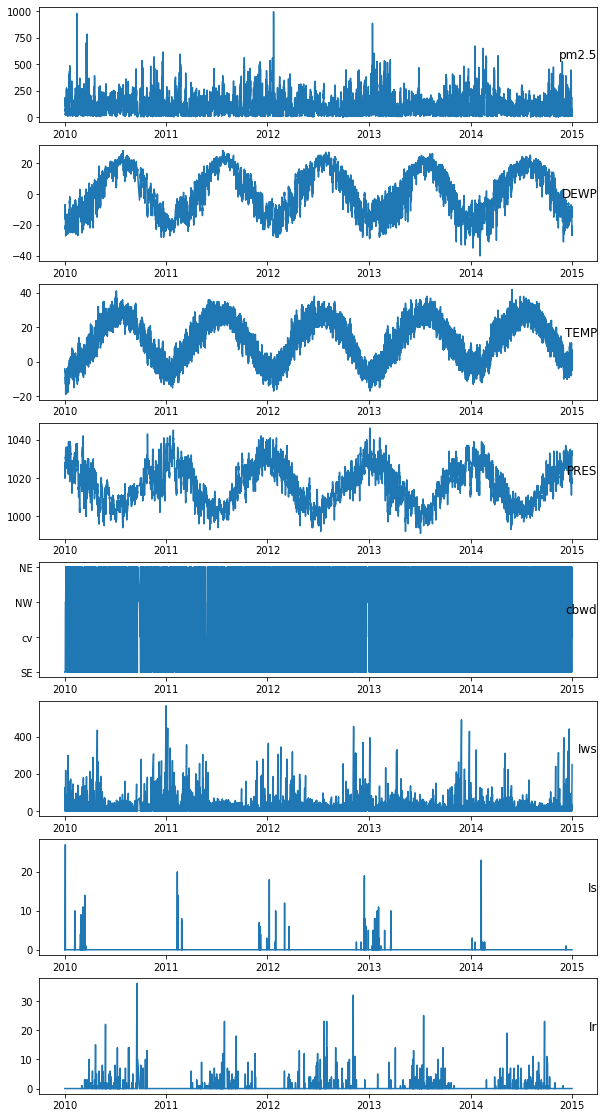

In [ ]:
import matplotlib.pyplot as plt

no_cols= len(pollution_INDEXED.columns)

index=1

plt.figure(figsize=(10,20))
for column in pollution_INDEXED.columns:
  plt.subplot(no_cols,1,index)
  plt.plot(pollution_INDEXED[column])
  plt.title(column,loc='right' , y=0.5)
  index+=1

plt.show()  


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

pollution_INDEXED ['cbwd'] = encoder.fit_transform(pollution_INDEXED[['cbwd']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pollution_INDEXED.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Timestamp,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


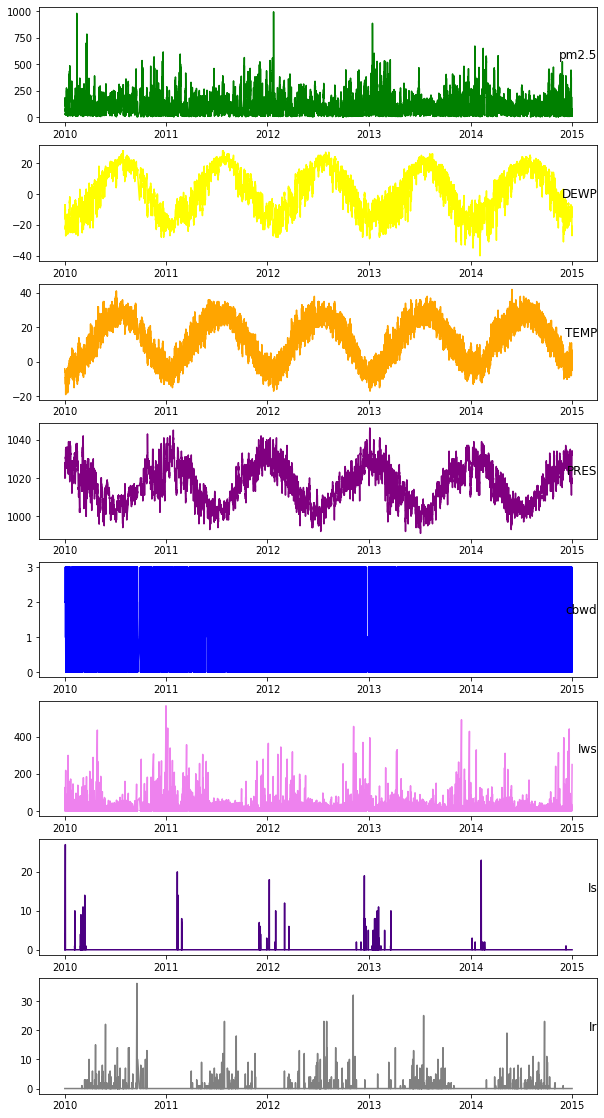

In [ ]:
no_cols= len(pollution_INDEXED.columns)

colors=['red','green','yellow','orange','purple','blue','violet','indigo','grey']

index=1

plt.figure(figsize=(10,20))
for column in pollution_INDEXED.columns:
  plt.subplot(no_cols,1,index)
  plt.plot(pollution_INDEXED[column], color=colors[index])
  plt.title(column,loc='right' , y=0.5)
  index+=1

plt.show()  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()

pollution_Transformed = scaler.fit_transform(pollution_INDEXED)

print(pollution_Transformed)

[[0.12977867 0.35294118 0.24590164 ... 0.00237151 0.         0.        ]
 [0.14889336 0.36764706 0.24590164 ... 0.00394662 0.         0.        ]
 [0.15995976 0.42647059 0.2295082  ... 0.00552173 0.         0.        ]
 ...
 [0.01006036 0.26470588 0.26229508 ... 0.42873071 0.         0.        ]
 [0.00804829 0.26470588 0.24590164 ... 0.43584525 0.         0.        ]
 [0.01207243 0.27941176 0.26229508 ... 0.44138468 0.         0.        ]]


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(pollution_Transformed, test_size = 0.10, shuffle=False)



In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input=3
n_features=8

generatorTrain =TimeseriesGenerator(train, train, length=n_input, batch_size=1)
generatorTest =TimeseriesGenerator(test, test, length=n_input, batch_size=1)

In [ ]:
batch_0 = generatorTrain[0]

x, y= batch_0

print(x, y)

[[[0.12977867 0.35294118 0.24590164 0.52727273 0.66666667 0.00237151
   0.         0.        ]
  [0.14889336 0.36764706 0.24590164 0.52727273 0.66666667 0.00394662
   0.         0.        ]
  [0.15995976 0.42647059 0.2295082  0.54545455 0.66666667 0.00552173
   0.         0.        ]]] [[0.18209256 0.48529412 0.2295082  0.56363636 0.66666667 0.00868965
  0.03703704 0.        ]]


In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
EPOCHS=5

model= Sequential()
model.add(LSTM (50, activation='tanh', input_shape =(n_input, n_features)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
model.fit(generatorTrain, epochs=EPOCHS, batch_size=72, shuffle=False)

Epoch 1/5
37578/37578 [==============================] - 107s 3ms/step - loss: 0.0105
Epoch 2/5
37578/37578 [==============================] - 106s 3ms/step - loss: 0.0098
Epoch 3/5
37578/37578 [==============================] - 104s 3ms/step - loss: 0.0096
Epoch 4/5
37578/37578 [==============================] - 104s 3ms/step - loss: 0.0095
Epoch 5/5
37578/37578 [==============================] - 104s 3ms/step - loss: 0.0094
